In [1]:
from datenguidepy.query_helper import get_all_regions, get_statistics
from datenguidepy import Query
import pandas as pd
import matplotlib
%matplotlib inline

/home/konrad/programming/python/correlaid/datenguide-python


## How did the amount of car accidents develop over the years in Berlin?

In [2]:
# get all states, which are nuts level 1
get_all_regions().query("name == 'Berlin'")

,name,level,parent
id,,,
11,Berlin,nuts1,DG
11000000,Berlin,lau,11


In [3]:
# find out the name of the desired statistic
get_statistics().query('short_description.str.contains("unfälle")', engine='python')

,statistics,short_description,long_description
121,AI1302,Straßenverkehrsunfälle je 10.000 Einwohner,**Straßenverkehrsunfälle je 10.000 Einwohner**...
122,AI1303,Straßenverkehrsunfälle je 10.000 Kfz,**Straßenverkehrsunfälle je 10.000 Kfz**\n*aus...
123,AI1304,Getötete bei Straßenverkehrsunfällen je 100.00...,**Getötete bei Straßenverkehrsunfällen je 100....
124,AI1305,Verletzte bei Straßenverkehrsunfällen je 100.0...,**Verletzte bei Straßenverkehrsunfällen je 100...


In [4]:
q = Query.region('11')

In [5]:
f1 = q.add_field('AI1302')
f2 = q.add_field('AI1304')

In [6]:
f1.get_info()

kind:
OBJECT

description:
Straßenverkehrsunfälle je 10.000 Einwohner

arguments:
year('LIST', None, 'SCALAR', 'Int'), statistics('LIST', None, 'ENUM', 'AI1302Statistics')

fields:
id, year, value, source

enum values:
None


In [7]:
f2.get_info()

kind:
OBJECT

description:
Getötete bei Straßenverkehrsunfällen je 100.000 EW

arguments:
year('LIST', None, 'SCALAR', 'Int'), statistics('LIST', None, 'ENUM', 'AI1304Statistics')

fields:
id, year, value, source

enum values:
None


In [8]:
results = q.results()

In [9]:
results

,id,name,year,AI1302,AI1304,AI1302_source_title_de,AI1302_source_valid_from,AI1302_source_periodicity,AI1302_source_name,AI1302_source_url,AI1304_source_title_de,AI1304_source_valid_from,AI1304_source_periodicity,AI1304_source_name,AI1304_source_url
0,11,Berlin,1995,67.0,4.1,Regionalatlas Deutschland,1995-01-01T00:00:00,JAEHRLICH,99910,None,Regionalatlas Deutschland,1995-01-01T00:00:00,JAEHRLICH,99910,None
1,11,Berlin,2000,57.1,2.6,Regionalatlas Deutschland,1995-01-01T00:00:00,JAEHRLICH,99910,None,Regionalatlas Deutschland,1995-01-01T00:00:00,JAEHRLICH,99910,None
2,11,Berlin,2005,47.0,2.0,Regionalatlas Deutschland,1995-01-01T00:00:00,JAEHRLICH,99910,None,Regionalatlas Deutschland,1995-01-01T00:00:00,JAEHRLICH,99910,None
3,11,Berlin,2006,47.7,2.2,Regionalatlas Deutschland,1995-01-01T00:00:00,JAEHRLICH,99910,None,Regionalatlas Deutschland,1995-01-01T00:00:00,JAEHRLICH,99910,None
4,11,Berlin,2007,49.2,1.6,Regionalatlas Deutschland,1995-01-01T00:00:00,JAEHRLICH,99910,None,Regionalatlas Deutschland,1995-01-01T00:00:00,JAEHRLICH,99910,None
5,11,Berlin,2008,49.9,1.6,Regionalatlas Deutschland,1995-01-01T00:00:00,JAEHRLICH,99910,None,Regionalatlas Deutschland,1995-01-01T00:00:00,JAEHRLICH,99910,None
6,11,Berlin,2009,45.8,1.4,Regionalatlas Deutschland,1995-01-01T00:00:00,JAEHRLICH,99910,None,Regionalatlas Deutschland,1995-01-01T00:00:00,JAEHRLICH,99910,None
7,11,Berlin,2010,41.9,1.3,Regionalatlas Deutschland,1995-01-01T00:00:00,JAEHRLICH,99910,None,Regionalatlas Deutschland,1995-01-01T00:00:00,JAEHRLICH,99910,None
8,11,Berlin,2011,48.9,1.6,Regionalatlas Deutschland,1995-01-01T00:00:00,JAEHRLICH,99910,None,Regionalatlas Deutschland,1995-01-01T00:00:00,JAEHRLICH,99910,None
9,11,Berlin,2012,48.1,1.3,Regionalatlas Deutschland,1995-01-01T00:00:00,JAEHRLICH,99910,None,Regionalatlas Deutschland,1995-01-01T00:00:00,JAEHRLICH,99910,None


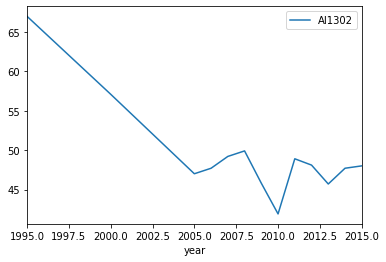

In [10]:
results.set_index('year')[['AI1302']].plot()

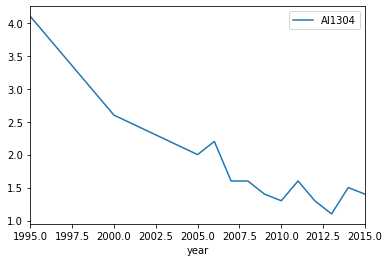

In [11]:
results.set_index('year')[['AI1304']].plot()

Both, accidents per 10.000 inhabitants (AI1302), as well as killed people per 100.000 inhabitants (AI1304) decreased significantly especially between 1995 and 2005.